In [68]:
import numpy as np
import earthpy as ep
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib.colors import ListedColormap, BoundaryNorm

In [51]:
data = np.array([-11, -9, -7, -5, -3, -2, -1, -0.5, 11, 9, 7, 5, 3, 2, 1, 0.5])

In [52]:
len(data)

16

In [53]:
data_temp = data
for i in range(len(data)-1):
    data_temp = np.vstack((data_temp,data))
data = data_temp
data

array([[-11. ,  -9. ,  -7. ,  -5. ,  -3. ,  -2. ,  -1. ,  -0.5,  11. ,
          9. ,   7. ,   5. ,   3. ,   2. ,   1. ,   0.5],
       [-11. ,  -9. ,  -7. ,  -5. ,  -3. ,  -2. ,  -1. ,  -0.5,  11. ,
          9. ,   7. ,   5. ,   3. ,   2. ,   1. ,   0.5],
       [-11. ,  -9. ,  -7. ,  -5. ,  -3. ,  -2. ,  -1. ,  -0.5,  11. ,
          9. ,   7. ,   5. ,   3. ,   2. ,   1. ,   0.5],
       [-11. ,  -9. ,  -7. ,  -5. ,  -3. ,  -2. ,  -1. ,  -0.5,  11. ,
          9. ,   7. ,   5. ,   3. ,   2. ,   1. ,   0.5],
       [-11. ,  -9. ,  -7. ,  -5. ,  -3. ,  -2. ,  -1. ,  -0.5,  11. ,
          9. ,   7. ,   5. ,   3. ,   2. ,   1. ,   0.5],
       [-11. ,  -9. ,  -7. ,  -5. ,  -3. ,  -2. ,  -1. ,  -0.5,  11. ,
          9. ,   7. ,   5. ,   3. ,   2. ,   1. ,   0.5],
       [-11. ,  -9. ,  -7. ,  -5. ,  -3. ,  -2. ,  -1. ,  -0.5,  11. ,
          9. ,   7. ,   5. ,   3. ,   2. ,   1. ,   0.5],
       [-11. ,  -9. ,  -7. ,  -5. ,  -3. ,  -2. ,  -1. ,  -0.5,  11. ,
          9. ,   7. ,   5.

In [54]:
data.shape

(16, 16)

In [55]:
datax = xr.DataArray(data)

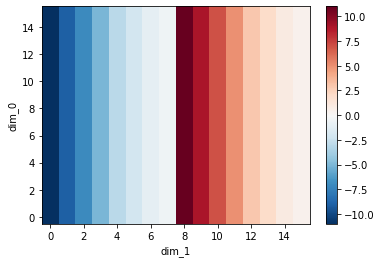

In [56]:
f, ax = plt.subplots()
datax.plot.imshow(ax=ax)
plt.show()

In [63]:
datax_class = xr.apply_ufunc(np.digitize,
                              datax,
                              [-np.inf, 0, np.inf])
datax_class

<xarray.DataArray (dim_0: 16, dim_1: 16)>
array([[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2]], dtype=int64)
Dimensions without coordinates: dim_0, dim_1

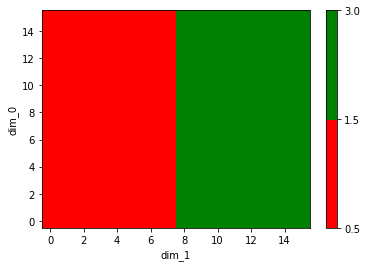

In [76]:
colors = ['red', 'green']
cmap = ListedColormap(colors)
class_bins = [0.5,1.5,3]
norm = BoundaryNorm(class_bins, len(colors))
f, ax = plt.subplots()
datax_class.plot.imshow(ax=ax,
                        cmap=cmap,
                        norm=norm)
plt.show()

So that's working. I'm guessing it's the BoundaryNorm part that is stuffing everything up?